In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


In [6]:
def pie_plot_total_emotions(df_morning, df_afternoon, title, neutral=True):
    labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']
    
    if not neutral: 
        labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']
    
    
    sizes_afternoon = [df_afternoon.sum()[label] for label in labels]
    sizes_morning = [df_morning.sum()[label] for label in labels]

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    fig.suptitle(title)
    axs[0].pie(sizes_morning, labels=labels, autopct='%1.1f%%')
    axs[0].set_title('Morning')

    axs[1].pie(sizes_afternoon, labels=labels, autopct='%1.1f%%')
    axs[1].set_title('Afternoon')

In [21]:
df_facial_vocals_morning = pd.read_csv('../data/hume/processed/Cuban_vocals_morning.csv', index_col=0)
df_text_vocals_morning = pd.read_csv('../data/emotion_from_transcript/binary_sentiment/jazzaar-20230417-morning-JFLB-Cuban-Vocals-video Philipp.csv', index_col=0)

df_facial_vocals_afternoon = pd.read_csv('../data/hume/processed/Cuban_vocals_afternoon.csv', index_col=0)
df_text_vocals_afternoon = pd.read_csv('../data/emotion_from_transcript/binary_sentiment/jazzaar-20230417-afternoon-JFLB-Cuban-Vocals-video Philipp.csv', index_col=0)

df_facial_vocals = pd.concat([df_facial_vocals_morning, df_facial_vocals_afternoon])
df_text_vocals = pd.concat([df_text_vocals_morning, df_text_vocals_afternoon])


df_facial_band_morning = pd.read_csv('../data/hume/processed/Funk_band_morning.csv', index_col=0)
df_text_band_morning = pd.read_csv('../data/emotion_from_transcript/binary_sentiment/JFBB_Jazz_Funk_morning_video20230419101818 Luis Cal García.csv', index_col=0)


# df_facial_band_afternoon = pd.read_csv('../data/hume/processed/Funk_band_afternoon.csv', index_col=0)
df_text_band_afternoon = pd.read_csv('../data/emotion_from_transcript/binary_sentiment/JFBB_Jazz_Funk_afternoon_video20230419143359 Luis Cal García.csv', index_col=0)

# df_facial_band = pd.concat([df_facial_band_morning, df_facial_band_afternoon])
df_text_band = pd.concat([df_text_band_morning, df_text_band_afternoon])


df_facial_rhythm_morning = pd.read_csv('../data/hume/processed/Funk_rhythm_morning.csv', index_col=0)
df_text_rhythm_morning = pd.read_csv('../data/emotion_from_transcript/binary_sentiment/JFBB_Rhythm_Section_Day1_Morning Thomas.csv', index_col=0)


# df_facial_rhythm_afternoon = pd.read_csv('../data/hume/processed/Funk_rhythm_afternoon.csv', index_col=0)
df_text_rhythm_afternoon = pd.read_csv('../data/emotion_from_transcript/binary_sentiment/JFBB_Rhythm_Section_Day1_Afternoon Thomas.csv', index_col=0)

# df_facial_rhythm = pd.concat([df_facial_rhythm_morning, df_facial_rhythm_afternoon])
df_text_rhythm = pd.concat([df_text_rhythm_morning, df_text_rhythm_afternoon])


df_facial_band = df_facial_band_morning
df_facial_rhythm = df_facial_rhythm_morning
df_facial_merged = pd.concat([df_facial_vocals, df_facial_band, df_facial_rhythm])
df_text_merged = pd.concat([df_text_vocals, df_text_band, df_text_rhythm])



Text(0, 0.5, 'Share of Sentiment in Percent')

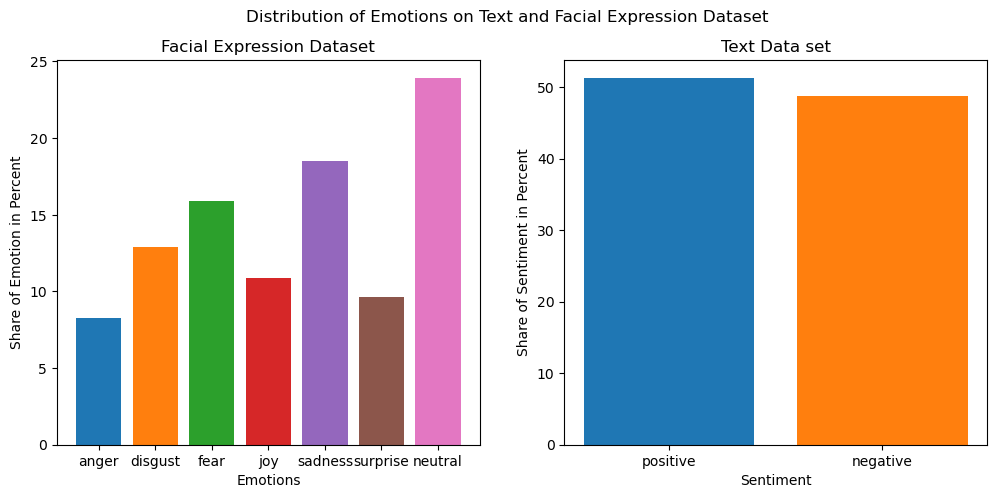

In [20]:
facial_features = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']
sentiment_features = ['positive', 'negative']

sizes_facial = [df_facial_merged.sum()[label] for label in facial_features]
sizes_text = [df_text_merged.sum()[label] for label in sentiment_features]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

colors_facial = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
fig.suptitle('Distribution of Emotions on Text and Facial Expression Dataset')
axs[0].bar(facial_features, (sizes_facial/sum(sizes_facial))*100, color=colors_facial)
axs[0].set_title('Facial Expression Dataset')
axs[0].set_ylabel('Share of Emotion in Percent')
axs[0].set_xlabel('Emotions')

colors_text = ['tab:blue', 'tab:orange']
axs[1].bar(sentiment_features, (sizes_text/sum(sizes_text))*100, color=colors_text)
axs[1].set_title('Text Data set')
axs[1].set_xlabel('Sentiment')
axs[1].set_ylabel('Share of Sentiment in Percent')

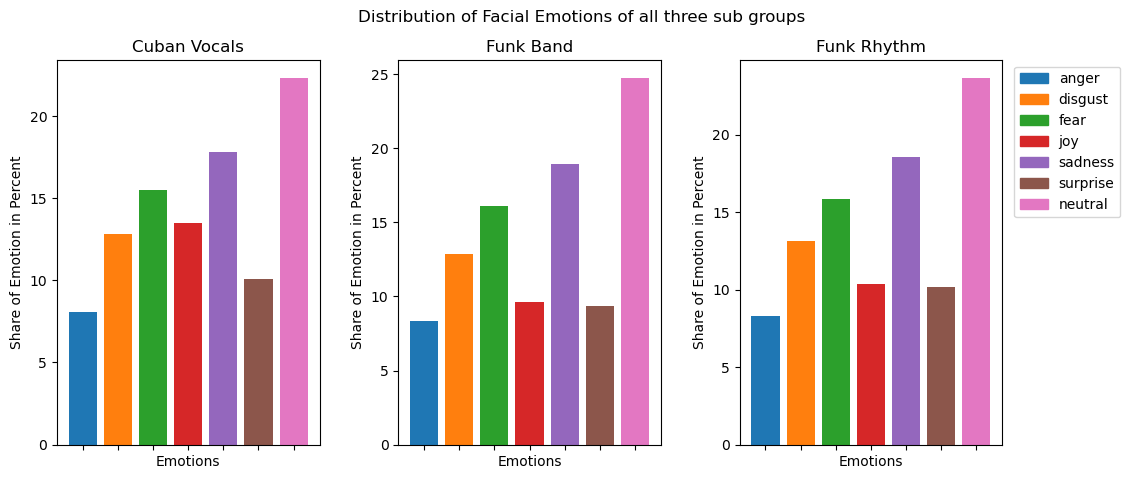

In [30]:
facial_features = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']

sizes_facial_vocals = [df_facial_vocals.sum()[label] for label in facial_features]
sizes_facial_band = [df_facial_band.sum()[label] for label in facial_features]
sizes_facial_rhythm = [df_facial_rhythm.sum()[label] for label in facial_features]

fig, axs = plt.subplots(1, 3, figsize=(14, 5))

colors_facial = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

fig.suptitle('Distribution of Facial Emotions of all three sub groups')
axs[0].bar(facial_features, (sizes_facial_vocals/sum(sizes_facial_vocals))*100, color=colors_facial)
axs[0].set_title('Cuban Vocals')
axs[0].set_ylabel('Share of Emotion in Percent')
axs[0].set_xlabel('Emotions')
axs[0].tick_params(axis='x', labelbottom=False)  # Disable x-axis tick labels

axs[1].bar(facial_features, (sizes_facial_band/sum(sizes_facial_band))*100, color=colors_facial)
axs[1].set_title('Funk Band')
axs[1].set_ylabel('Share of Emotion in Percent')
axs[1].set_xlabel('Emotions')
axs[1].tick_params(axis='x', labelbottom=False)  # Disable x-axis tick labels

axs[2].bar(facial_features, (sizes_facial_rhythm/sum(sizes_facial_rhythm))*100, color=colors_facial)
axs[2].set_title('Funk Rhythm')
axs[2].set_ylabel('Share of Emotion in Percent')
axs[2].set_xlabel('Emotions')
axs[2].tick_params(axis='x', labelbottom=False)  # Disable x-axis tick labels

# Create legend patches with color and label
legend_patches = [mpatches.Patch(color=color, label=emotion) for color, emotion in zip(colors_facial, facial_features)]
# Place the legend at the top right corner
plt.legend(handles=legend_patches, bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust spacing between subplots and legend position
plt.subplots_adjust(wspace=0.3, right=0.8)

# Show the plot
plt.show()


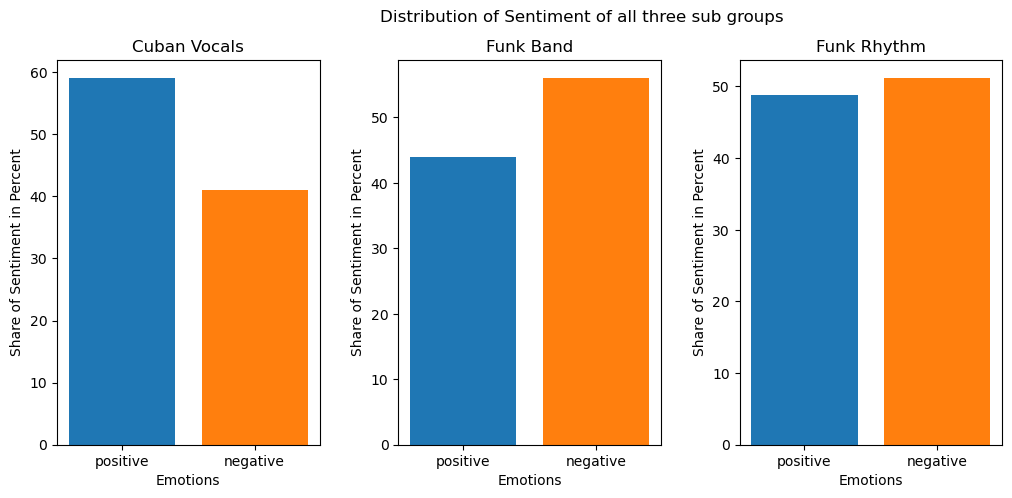

In [34]:
text_features = ['positive', 'negative']

sizes_text_vocals = [df_text_vocals.sum()[label] for label in text_features]
sizes_text_band = [df_text_band.sum()[label] for label in text_features]
sizes_text_rhythm = [df_text_rhythm.sum()[label] for label in text_features]

fig, axs = plt.subplots(1, 3, figsize=(14, 5))

colors_text = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

fig.suptitle('Distribution of Sentiment of all three sub groups')
axs[0].bar(text_features, (sizes_text_vocals/sum(sizes_text_vocals))*100, color=colors_text)
axs[0].set_title('Cuban Vocals')
axs[0].set_ylabel('Share of Sentiment in Percent')
axs[0].set_xlabel('Emotions')

axs[1].bar(text_features, (sizes_text_band/sum(sizes_text_band))*100, color=colors_text)
axs[1].set_title('Funk Band')
axs[1].set_ylabel('Share of Sentiment in Percent')
axs[1].set_xlabel('Emotions')

axs[2].bar(text_features, (sizes_text_rhythm/sum(sizes_text_rhythm))*100, color=colors_text)
axs[2].set_title('Funk Rhythm')
axs[2].set_ylabel('Share of Sentiment in Percent')
axs[2].set_xlabel('Emotions')

# Adjust spacing between subplots and legend position
plt.subplots_adjust(wspace=0.3, right=0.8)

# Show the plot
plt.show()
